# Depth and depth-based classification

### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

### MVN1

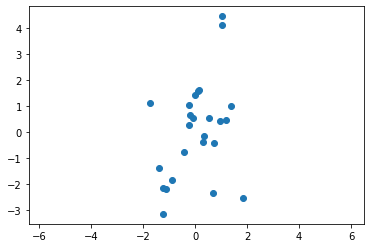

In [3]:
mean1 = [0, 0]
cov1 = [[1, 1], [1, 4]]
x, y = np.random.multivariate_normal(mean1, cov1, 25).T
plt.plot(x, y, 'o')
plt.axis('equal')
plt.show()

### MVN2

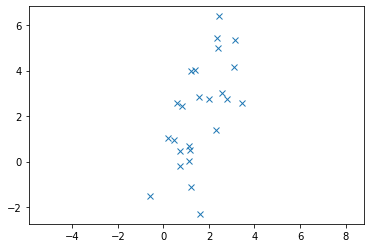

In [9]:
mean2 = [2, 2]
cov2 = [[1, 1], [1, 4]]
x, y = np.random.multivariate_normal(mean, cov, 25).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

### MVN3

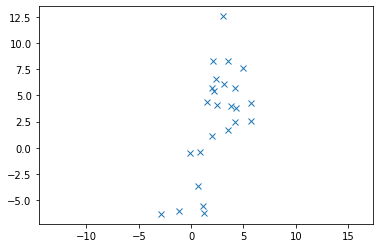

In [26]:
mean3 = [2, 2]
cov3 = [[4, 4], [4, 16]]
X3, Y3 = np.random.multivariate_normal(mean, cov, 25).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [27]:
for x in X3:
    print (x)

3.3076861241239177
1.9780075730454594
2.850949697157249
2.1996916122694867
0.29393723810866756
4.471698255714262
3.0747007751323583
2.5984726066435884
0.6267501222407454
1.4905517573367972
2.4840992726123865
2.1458672484074333
1.6004418743295574
5.095346324904208
4.372245833294419
2.3914133509907636
2.415843814631591
3.7636310929882058
1.799099310421868
1.072535173314257
0.3032665089595863
0.4521767565512369
2.480971419969525
2.121302964466251
4.352659534857366


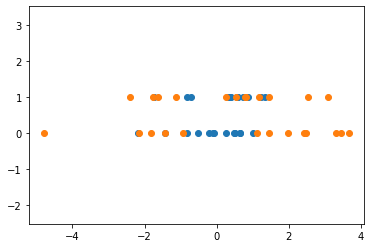

In [42]:
mu = [0, 0]
sigma = [[1, 1], [1, 4]]
n = 25
X0 = np.random.multivariate_normal(mu, sigma, n)
y0 = np.random.randint(2, size=n)
plt.plot(X0, y0, 'o')
plt.axis('equal')
plt.show()

In [48]:
np.cov(X0)

array([[ 8.69909162e-02, -4.66989797e-02,  2.16392684e-02,
         7.79264438e-03, -2.28373857e-02,  3.49679511e-01,
        -4.89025315e-01,  3.53200380e-01, -5.82883882e-01,
        -6.48567585e-02, -4.43415268e-01,  5.42254425e-01,
        -4.55238666e-01,  3.61970747e-01, -2.53861467e-01,
        -2.02770427e-01,  2.05119476e-02,  1.89611227e-01,
        -4.32010015e-02,  1.49159188e-01, -8.25127700e-01,
        -3.02424033e-01, -6.28112375e-01,  3.32004563e-01,
        -3.71260576e-01],
       [-4.66989797e-02,  2.50692233e-02, -1.16165205e-02,
        -4.18329358e-03,  1.22597008e-02, -1.87717029e-01,
         2.62521470e-01, -1.89607123e-01,  3.12907183e-01,
         3.48167898e-02,  2.38036815e-01, -2.91096237e-01,
         2.44383921e-01, -1.94315284e-01,  1.36279419e-01,
         1.08852423e-01, -1.10113454e-02, -1.01788223e-01,
         2.31914179e-02, -8.00725201e-02,  4.42949946e-01,
         1.62349063e-01,  3.37187011e-01, -1.78228659e-01,
         1.99302305e-01],
    

In [49]:
np.linalg.inv(np.cov(X0))

array([[ 8.33343559e+15,  4.06108220e+15, -2.42118449e+16,
         3.57814821e+16,  6.18707370e+16,  5.02751805e+15,
         1.00087969e+14, -1.70050971e+15,  2.62462477e+15,
        -3.49621264e+16, -2.73686407e+14,  8.79849982e+13,
        -3.36842730e+15, -1.83790308e+14, -1.64050971e+15,
        -1.44740011e+15, -1.45730554e+17,  7.26952444e+15,
        -5.60806697e+15, -5.20217133e+15, -1.64755112e+15,
         2.75707866e+15,  7.06220446e+14, -2.86770249e+15,
         1.47426097e+14],
       [ 1.45490680e+17,  1.23941201e+17, -2.19876954e+17,
         1.64668985e+18, -1.49930122e+17,  4.47042321e+15,
        -1.47075934e+16, -8.95434412e+15,  1.74698773e+16,
        -1.55670488e+17,  1.71463827e+16,  5.34974656e+15,
         2.64257099e+16, -1.17088272e+16,  1.56663032e+16,
        -6.33355256e+16, -9.64730434e+17, -1.88854953e+16,
        -1.60033549e+17,  2.00407105e+16, -1.34821359e+16,
         2.83778225e+16, -1.50345258e+16, -1.46233486e+16,
         1.46317835e+16],
    

### Computing the Mahalanobis depth

In [50]:
iv = np.linalg.inv(np.cov(X0))
distance.mahalanobis([2, 2], [4, 4, 16], iv)

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [6]:
def depthMah(x,mean1,cov1) :
    mean1 = np.asarray(mean1)
    dist = (x-mean1).T.dot(np.linalg.inv(cov1)).dot(x-mean1)
    return 1/(1+dist)

In [7]:
depthMah(np.asarray([1,2]),mean1,cov1)

0.4285714285714286

In [24]:
def mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

AttributeError: 'numpy.ndarray' object has no attribute 'values'